# Classification of rice samples using Deep Learning

In [1]:
# Dependencies for data processing
import pandas as pd
import numpy as np

import seaborn as sn

In [2]:
# Load the data
data = pd.read_csv("DS2014PHY_alldata-2.csv")
data.head()

,Plot,GT_DSC,AC,PV,TV,BD,FV,SB,LO,PT,...,LM_SMMAX,TD_SMMAX,TEMP_GELPT,TEMP_SMMAX,TROUGH_SM,SLOPE1_SM,SLOPE2_SM_abs,SLOPE3_LM,SLOPE4_LM_abs,PC
0,Plt0011,76.48,23.6,278.58,188.67,89.92,359.08,80.50,170.42,5.9,...,3344.00,0.09,59.40,82.07,14333.33,9875.3750,1612.1600,2062.1675,2162.0400,10.06
1,Plt0026,75.91,23.5,178.75,117.83,60.92,246.58,67.83,128.75,5.7,...,6615.67,0.12,58.17,76.67,20113.33,6943.1100,1768.6675,2166.6750,614.9500,9.88
2,Plt0045,75.10,25.2,159.83,102.50,57.33,217.58,57.75,115.08,5.6,...,4055.67,0.12,59.07,80.23,12866.67,4125.1175,1367.6675,1061.1675,638.4000,7.91
3,Plt0052,76.94,24.9,208.58,140.58,68.00,280.92,72.33,140.33,5.7,...,2615.67,0.09,61.40,83.53,12700.00,4798.2225,1396.0100,1084.9775,1325.5850,9.76
4,Plt0054,76.19,23.9,242.75,180.00,62.75,358.42,115.67,178.42,5.7,...,3962.67,0.10,61.23,80.77,15466.67,7372.0675,1671.9625,1685.4150,1052.1825,8.45


In [3]:
# How many samples and how many variables?
data.shape

(211, 26)

In [4]:
# List of columns
data.columns

Index(['Plot ', 'GT_DSC', 'AC', 'PV', 'TV', 'BD', 'FV', 'SB', 'LO', 'PT',
       'PASTEMP_RECALC', 'HRD', 'ADH', 'COH', 'SPR', 'SMMAX', 'LM_SMMAX',
       'TD_SMMAX', 'TEMP_GELPT', 'TEMP_SMMAX', 'TROUGH_SM', 'SLOPE1_SM',
       'SLOPE2_SM_abs', 'SLOPE3_LM', 'SLOPE4_LM_abs', 'PC'],
      dtype='object')

In [5]:
# Remove Plot Number
data2 = data.drop(columns = ["Plot "], axis = 1)

### Data Cleaning
Exclude variables that are correlated with each other

In [6]:
corr = data2.corr(method = "pearson")
corr

,GT_DSC,AC,PV,TV,BD,FV,SB,LO,PT,PASTEMP_RECALC,...,LM_SMMAX,TD_SMMAX,TEMP_GELPT,TEMP_SMMAX,TROUGH_SM,SLOPE1_SM,SLOPE2_SM_abs,SLOPE3_LM,SLOPE4_LM_abs,PC
GT_DSC,1.000000,-0.049318,0.076978,-0.209433,0.540833,-0.104496,-0.354791,0.126957,-0.371152,0.819054,...,-0.110148,0.194564,0.751095,0.214379,-0.254732,-0.094298,-0.120491,0.047909,-0.063239,-0.119446
AC,-0.049318,1.000000,-0.074604,0.046802,-0.240006,0.099976,0.341110,0.166408,-0.099999,-0.007187,...,0.134227,0.138045,0.077744,-0.050313,0.081870,-0.014404,0.028977,0.017891,0.011231,-0.370468
PV,0.076978,-0.074604,1.000000,0.876308,0.481510,0.879680,0.080211,0.593402,0.484314,0.013804,...,-0.146691,-0.028553,0.066174,0.147731,-0.103540,-0.062751,-0.060869,-0.026505,0.010593,-0.191649
TV,-0.209433,0.046802,0.876308,1.000000,-0.000276,0.941807,0.428566,0.519464,0.743156,-0.221275,...,-0.046662,-0.070494,-0.125390,0.092238,0.067521,0.005084,0.038129,0.014728,0.073577,0.008530
BD,0.540833,-0.240006,0.481510,-0.000276,1.000000,0.112595,-0.613181,0.286708,-0.346689,0.431255,...,-0.219625,0.068986,0.365518,0.138881,-0.337775,-0.139519,-0.195721,-0.081840,-0.111860,-0.413326
FV,-0.104496,0.099976,0.879680,0.941807,0.112595,1.000000,0.544594,0.776477,0.558728,-0.166288,...,-0.062108,-0.080553,-0.074088,0.106022,0.050018,-0.002110,0.036143,0.030746,0.041882,-0.050131
SB,-0.354791,0.341110,0.080211,0.428566,-0.613181,0.544594,1.000000,0.580975,0.316951,-0.372901,...,0.128516,-0.118498,-0.272012,-0.038325,0.287456,0.106252,0.183079,0.111195,0.069106,0.232915
LO,0.126957,0.166408,0.593402,0.519464,0.286708,0.776477,0.580975,1.000000,0.027174,-0.007913,...,-0.070409,-0.072618,0.046722,0.096612,0.000577,-0.014895,0.020376,0.050531,-0.031466,-0.143403
PT,-0.371152,-0.099999,0.484314,0.743156,-0.346689,0.558728,0.316951,0.027174,1.000000,-0.255803,...,0.054630,-0.049065,-0.262259,0.011402,0.157259,0.072290,0.058203,-0.017352,0.131682,0.171264
PASTEMP_RECALC,0.819054,-0.007187,0.013804,-0.221275,0.431255,-0.166288,-0.372901,-0.007913,-0.255803,1.000000,...,-0.048702,0.244574,0.653566,0.136691,-0.173839,-0.097200,-0.088828,0.029858,-0.091012,-0.144080


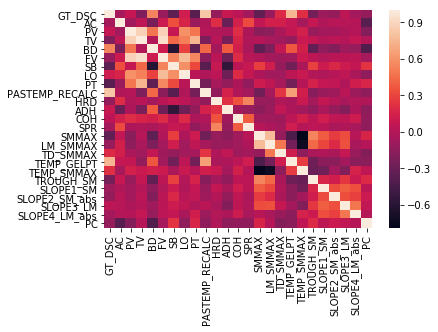

In [7]:
sn.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values)

In [8]:
# Create a function that retains only the lower correlation pairs 
def remove_redundant_pairs(df):
    # Create an empty set for redundant pairs
    pairs_for_dropping = set()
    
    # List of variables
    cols = df.columns
    
    # Loop through the column and create a set of variable pairs
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_for_dropping.add((cols[i], cols[j]))
            
    return pairs_for_dropping

In [9]:
# Create a function that identifies the highest correlations
def highest_correlations(df, n = 15):
    # Reshape the correlation matrix such that correlation coefficients are in one column
    unstacked_correlation = df.corr(method = "pearson").abs().unstack()
    
    # Drop the redundant pairs (upper triangle of correlation matrix)     
    drop_variables = remove_redundant_pairs(df)
    
    # Show correlation coefficients in descending order for non-redundant pairs    
    correlations = unstacked_correlation.drop(labels = drop_variables).sort_values(ascending = False)
    
    return correlations[0:n]

In [10]:
# See the variable pairs with the highest correlation coefficients
highest_correlations(data2)  

TV              FV                0.941807
PV              FV                0.879680
                TV                0.876308
GT_DSC          PASTEMP_RECALC    0.819054
SMMAX           TEMP_SMMAX        0.787948
FV              LO                0.776477
SMMAX           LM_SMMAX          0.775430
GT_DSC          TEMP_GELPT        0.751095
TV              PT                0.743156
LM_SMMAX        TEMP_SMMAX        0.730539
PASTEMP_RECALC  TEMP_GELPT        0.653566
BD              SB                0.613181
PV              LO                0.593402
SB              LO                0.580975
                ADH               0.562368
dtype: float64

In [11]:
# Choose a variable in the pairs that could be removed from the analyses
data3 = data2.drop(columns = ["PASTEMP_RECALC", "TEMP_GELPT", "LM_SMMAX", 
                              "FV", "TV", "TEMP_SMMAX", "PV"], axis = 1)
data3.head()

,GT_DSC,AC,BD,SB,LO,PT,HRD,ADH,COH,SPR,SMMAX,TD_SMMAX,TROUGH_SM,SLOPE1_SM,SLOPE2_SM_abs,SLOPE3_LM,SLOPE4_LM_abs,PC
0,76.48,23.6,89.92,80.50,170.42,5.9,1681.73,9.61,0.45,0.09,36146.67,0.09,14333.33,9875.3750,1612.1600,2062.1675,2162.0400,10.06
1,75.91,23.5,60.92,67.83,128.75,5.7,1372.38,8.50,0.39,0.09,55196.67,0.12,20113.33,6943.1100,1768.6675,2166.6750,614.9500,9.88
2,75.10,25.2,57.33,57.75,115.08,5.6,1338.51,7.47,0.38,0.12,35406.67,0.12,12866.67,4125.1175,1367.6675,1061.1675,638.4000,7.91
3,76.94,24.9,68.00,72.33,140.33,5.7,2138.97,22.93,0.39,0.10,30183.33,0.09,12700.00,4798.2225,1396.0100,1084.9775,1325.5850,9.76
4,76.19,23.9,62.75,115.67,178.42,5.7,1248.32,7.40,0.36,0.11,39013.33,0.10,15466.67,7372.0675,1671.9625,1685.4150,1052.1825,8.45


In [12]:
# Summary statistics
data3.describe()

,GT_DSC,AC,BD,SB,LO,PT,HRD,ADH,COH,SPR,SMMAX,TD_SMMAX,TROUGH_SM,SLOPE1_SM,SLOPE2_SM_abs,SLOPE3_LM,SLOPE4_LM_abs,PC
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,75.971422,24.723223,75.998768,59.688815,135.687773,5.907583,1922.302227,19.415308,0.432322,0.112417,35177.819858,0.112038,13837.909242,6330.278187,1486.931635,1525.054419,1347.332500,8.506114
std,3.303884,1.972352,22.509342,26.494258,21.846138,0.251942,499.556556,12.062703,0.054797,0.015379,10428.896724,0.027913,3945.942664,2715.775325,509.806638,702.948310,766.942593,1.159543
min,66.440000,19.100000,18.500000,-12.170000,45.080000,5.300000,649.080000,3.470000,0.270000,0.080000,13740.000000,0.060000,3910.000000,1158.897500,502.240000,279.945000,88.655000,5.580000
25%,76.280000,23.700000,62.955000,47.415000,121.250000,5.700000,1622.210000,10.920000,0.390000,0.100000,27615.000000,0.090000,11721.665000,4292.501250,1241.720000,1011.336250,774.063750,7.680000
50%,77.020000,24.900000,73.920000,59.500000,134.750000,5.900000,1915.930000,17.580000,0.430000,0.110000,35150.000000,0.110000,13800.000000,6146.502500,1459.575000,1469.720000,1155.417500,8.330000
75%,77.795000,26.000000,89.835000,74.460000,150.000000,6.100000,2251.565000,22.840000,0.470000,0.120000,42496.665000,0.120000,15700.000000,7741.253750,1679.476250,1906.198750,1701.725000,9.220000
max,79.940000,32.600000,130.750000,133.670000,190.920000,7.000000,3050.550000,85.940000,0.590000,0.150000,64123.330000,0.230000,52800.000000,16358.947500,7115.500000,4714.000000,3629.725000,12.380000


In [13]:
# Are there missing values? Because KMeans clustering does not allow missing values
data3.isna().sum()

GT_DSC           0
AC               0
BD               0
SB               0
LO               0
PT               0
HRD              0
ADH              0
COH              0
SPR              0
SMMAX            0
TD_SMMAX         0
TROUGH_SM        0
SLOPE1_SM        0
SLOPE2_SM_abs    0
SLOPE3_LM        0
SLOPE4_LM_abs    0
PC               0
dtype: int64

### Cluster Analyses

In [14]:
# Dependencies
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

Kmeans clustering

In [15]:
# Scale the data
data_scaler = StandardScaler().fit(data3)
data_transformed = data_scaler.transform(data3)

### Number of clusters?
Elbow method

In [16]:
# Calculate K-means
Sum_of_squared_distances = []

K = range(1, 20)

for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

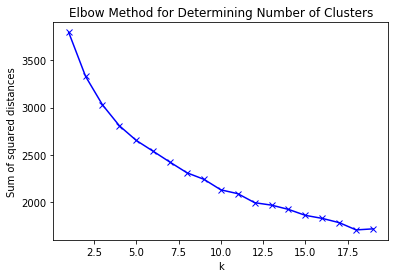

In [17]:
plt.plot(K, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum of squared distances")
plt.title("Elbow Method for Determining Number of Clusters")
plt.show()

Dendogram

Reference: http://www.awesomestats.in/python-cluster-validation/

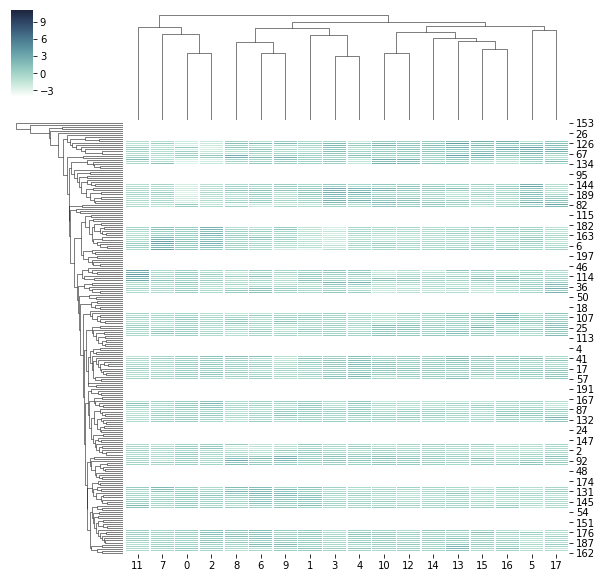

In [18]:
cmap = sn.cubehelix_palette(as_cmap = True, rot = -0.3, light = 1)
sn.clustermap(data_transformed, cmap = cmap, linewidths = 0.5)

Silhouette method

Reference: http://www.awesomestats.in/python-cluster-validation/


For 2 clusters, the silhouette score is 0.1169129725333795


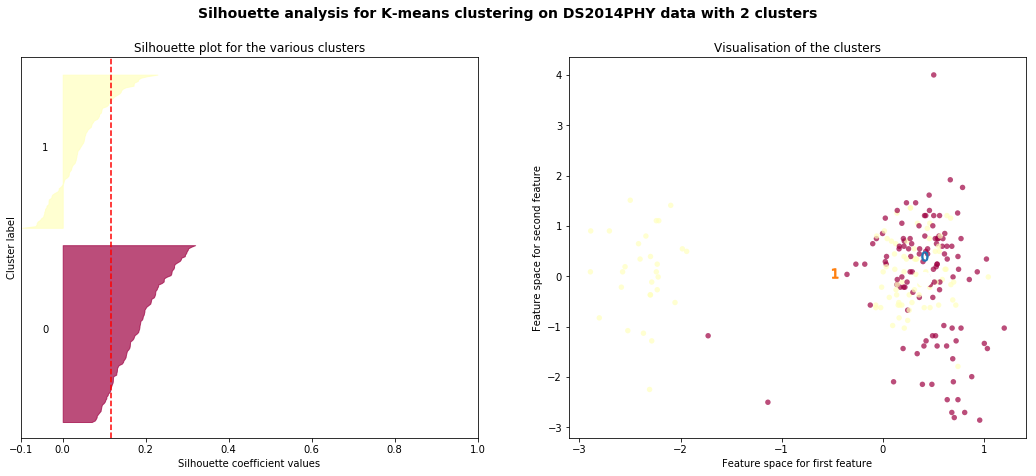


For 3 clusters, the silhouette score is 0.12568214819251372


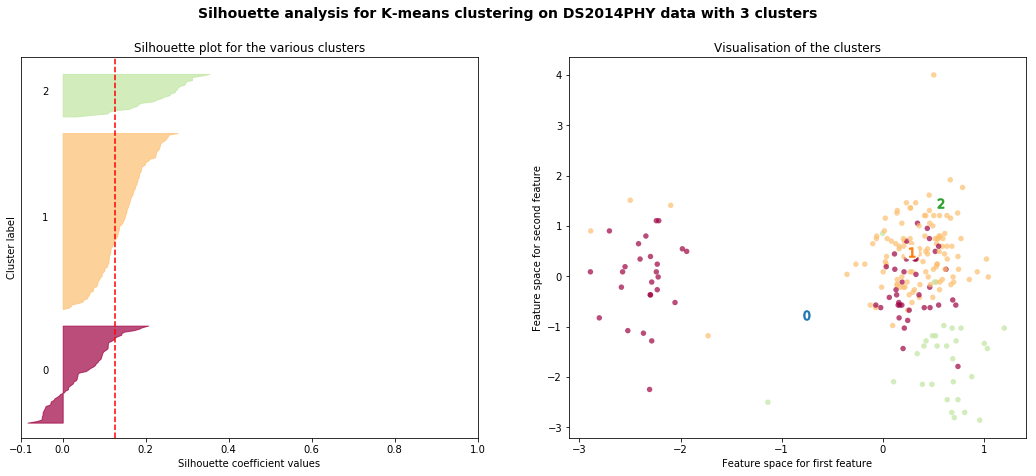


For 4 clusters, the silhouette score is 0.10398805675497273


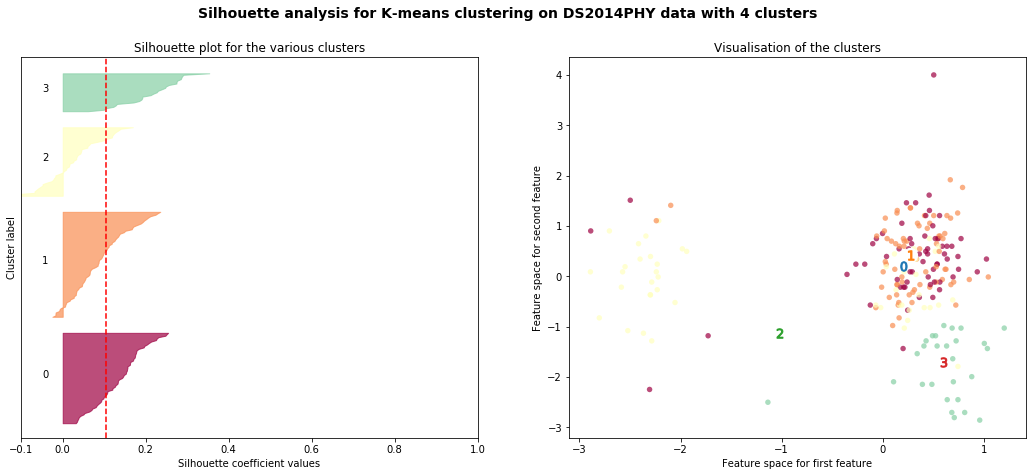


For 5 clusters, the silhouette score is 0.11570887352576088


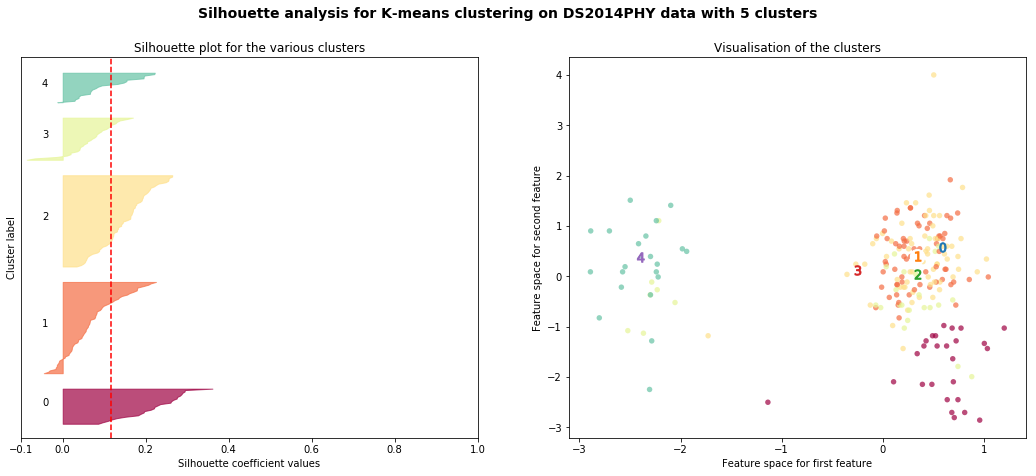

In [19]:
cluster_range = range(2, 6)

for n_clusters in cluster_range:
    
    # Create subplots with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    # Plot 1: Silhouette plot
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    
    # Initialise the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(data_transformed)
    
    # Silhouette average for all samples
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print(f"\nFor {n_clusters} clusters, the silhouette score is {silhouette_avg}")
    
    # Silhouette score for each sample
    sample_silhouette_score = silhouette_samples(data_transformed, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        # Group silhouette values by cluster and then sort
        ith_cluster_silhouette_value = sample_silhouette_score[cluster_labels == i]
        ith_cluster_silhouette_value.sort()
        
        size_cluster_i = ith_cluster_silhouette_value.shape[0]
        y_upper = y_lower + size_cluster_i
        
        colour = cm.Spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_value,
                         facecolor = colour, edgecolor = colour, alpha = 0.7)
        
        # Put cluster labels beside the silhouette plots
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Offset each cluster in the y-axis
        y_lower = y_upper + 10
    
    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # Vertical line for silhouette average
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    
    # Remove the y-axis ticks
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # Plot 2: Actual clusters
    colour = cm.Spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(data_transformed[:,0], data_transformed[:,1], marker = "o", s = 30, lw = 0, 
                alpha = 0.7, c = colour)
    
    # Cluster labels
    centres = clusterer.cluster_centers_
    
    # Draw the cluster centres
    ax2.scatter(centres[:,0], centres[:,1], marker = "o", c = "white", alpha = 1, s = 200)
    
    for i,c in enumerate(centres):
        ax2.scatter(c[0], c[i], marker = "$%d$" %i, alpha = 1, s = 90)
        
    ax2.set_title("Visualisation of the clusters")
    ax2.set_xlabel("Feature space for first feature")
    ax2.set_ylabel("Feature space for second feature")
    
    plt.suptitle((f"Silhouette analysis for K-means clustering on DS2014PHY data with {n_clusters} clusters"), 
                 fontsize = 14, fontweight = "bold")
    
    plt.show()

In [20]:
# Since the silhouette score is second highest at 5 clusters, the elbow method also suggests 5 clusters, 
# and the sample sizes are more or less equal at 5 clusters, predict 5 clusters

n_clusters = 5
km = KMeans(n_clusters = n_clusters)
km = km.fit(data_transformed)
predict = km.predict(data_transformed)
predict

array([2, 3, 4, 4, 3, 3, 0, 4, 4, 2, 0, 2, 4, 2, 1, 4, 4, 2, 2, 2, 0, 2,
       2, 2, 4, 3, 2, 4, 2, 3, 4, 3, 3, 0, 2, 4, 4, 3, 4, 4, 4, 2, 0, 3,
       4, 2, 0, 2, 3, 3, 2, 4, 2, 4, 2, 4, 4, 3, 3, 3, 4, 4, 2, 2, 2, 2,
       4, 3, 2, 1, 3, 2, 4, 3, 4, 4, 4, 3, 2, 4, 1, 3, 3, 4, 3, 3, 2, 4,
       1, 3, 4, 3, 2, 4, 0, 1, 4, 1, 2, 3, 4, 3, 3, 2, 1, 4, 1, 2, 1, 3,
       1, 3, 2, 3, 2, 0, 0, 2, 3, 1, 4, 4, 0, 0, 0, 4, 1, 1, 2, 4, 0, 4,
       4, 2, 1, 3, 2, 1, 1, 0, 0, 1, 4, 2, 1, 4, 4, 4, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 4, 4, 4, 0, 2, 4, 0, 1, 0, 2, 4, 0, 2, 1, 4, 4, 4, 2, 4,
       2, 2, 4, 3, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 4, 4, 4, 2, 2, 1, 4, 0,
       2, 3, 4, 4, 4, 4, 4, 4, 4, 2, 4, 3, 0], dtype=int32)

In [21]:
# Add the cluster number to the clean dataframe
data3["Cluster"] = pd.Series(predict, index = data3.index)
data3.head()

,GT_DSC,AC,BD,SB,LO,PT,HRD,ADH,COH,SPR,SMMAX,TD_SMMAX,TROUGH_SM,SLOPE1_SM,SLOPE2_SM_abs,SLOPE3_LM,SLOPE4_LM_abs,PC,Cluster
0,76.48,23.6,89.92,80.50,170.42,5.9,1681.73,9.61,0.45,0.09,36146.67,0.09,14333.33,9875.3750,1612.1600,2062.1675,2162.0400,10.06,2
1,75.91,23.5,60.92,67.83,128.75,5.7,1372.38,8.50,0.39,0.09,55196.67,0.12,20113.33,6943.1100,1768.6675,2166.6750,614.9500,9.88,3
2,75.10,25.2,57.33,57.75,115.08,5.6,1338.51,7.47,0.38,0.12,35406.67,0.12,12866.67,4125.1175,1367.6675,1061.1675,638.4000,7.91,4
3,76.94,24.9,68.00,72.33,140.33,5.7,2138.97,22.93,0.39,0.10,30183.33,0.09,12700.00,4798.2225,1396.0100,1084.9775,1325.5850,9.76,4
4,76.19,23.9,62.75,115.67,178.42,5.7,1248.32,7.40,0.36,0.11,39013.33,0.10,15466.67,7372.0675,1671.9625,1685.4150,1052.1825,8.45,3


### Visualise the five clusters

In [22]:
# Create separate dataframes for n_clusters
clusters = list(range(0,n_clusters))

def create_dataframe(cluster):
    df = data3.loc[data3["Cluster"] == cluster]
    return df

dfs = []

# Loop through the clusters list to create dataframes
for cluster in clusters:
    dfs.append(create_dataframe(cluster))
    
dfs   

[     GT_DSC    AC      BD     SB      LO    PT      HRD    ADH   COH   SPR  \
 6     78.24  22.7  104.25  28.75  133.00  5.80  1832.63  43.78  0.44  0.10   
 10    77.58  20.5   92.17  44.17  136.33  5.87  1504.38  28.47  0.41  0.09   
 20    78.65  19.4   86.58  36.83  123.42  5.90  1678.02  59.43  0.45  0.08   
 33    78.43  19.9  127.25  -6.42  120.83  5.93  2490.70  85.94  0.47  0.09   
 42    79.94  22.7  119.42   5.08  124.50  6.10  1500.44  60.28  0.41  0.11   
 46    77.39  22.2  102.58  33.67  136.25  5.80  1561.87  22.50  0.38  0.09   
 94    77.97  22.8  104.08  12.00  116.08  5.90  1579.59  47.05  0.42  0.10   
 115   72.23  19.8  124.50 -12.17  112.33  5.70  2213.86  45.54  0.46  0.11   
 116   78.31  19.2  107.75  26.58  134.33  5.80  1720.45  37.97  0.42  0.09   
 122   77.60  22.4  117.25  -9.17  108.08  5.70  2676.38  47.88  0.49  0.12   
 123   78.08  19.9  114.83  12.25  127.08  5.70  1677.33  36.03  0.38  0.09   
 124   79.39  21.9  101.17  27.00  128.17  5.80  190

In [23]:
# How big are the clusters?
print(f"There are {dfs[0].shape[0]} samples in Cluster 0.")
print(f"There are {dfs[1].shape[0]} samples in Cluster 1.")
print(f"There are {dfs[2].shape[0]} samples in Cluster 2.")
print(f"There are {dfs[3].shape[0]} samples in Cluster 3.")
print(f"There are {dfs[4].shape[0]} samples in Cluster 4.")

There are 25 samples in Cluster 0.
There are 24 samples in Cluster 1.
There are 60 samples in Cluster 2.
There are 35 samples in Cluster 3.
There are 67 samples in Cluster 4.


(0, 25)

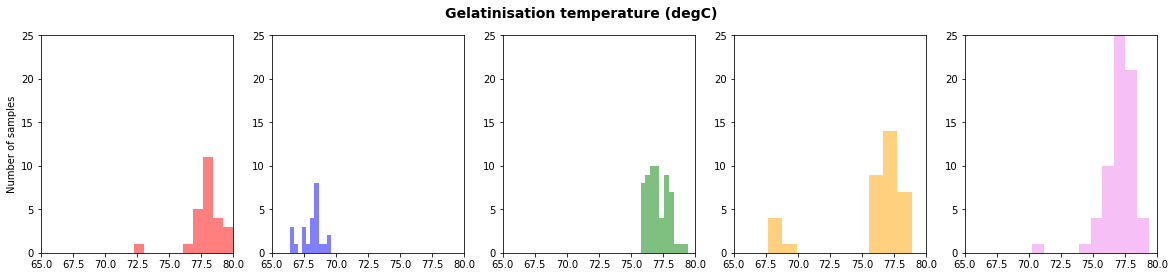

In [24]:
# Histogram for gelatinisation temperature
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].GT_DSC, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].GT_DSC, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].GT_DSC, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].GT_DSC, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].GT_DSC, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Gelatinisation temperature (degC)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([65,80])
ax2.set_xlim([65,80])
ax3.set_xlim([65,80])
ax4.set_xlim([65,80])
ax5.set_xlim([65,80])

ax1.set_ylim([0,25])
ax2.set_ylim([0,25])
ax3.set_ylim([0,25])
ax4.set_ylim([0,25])
ax5.set_ylim([0,25])

(0, 18)

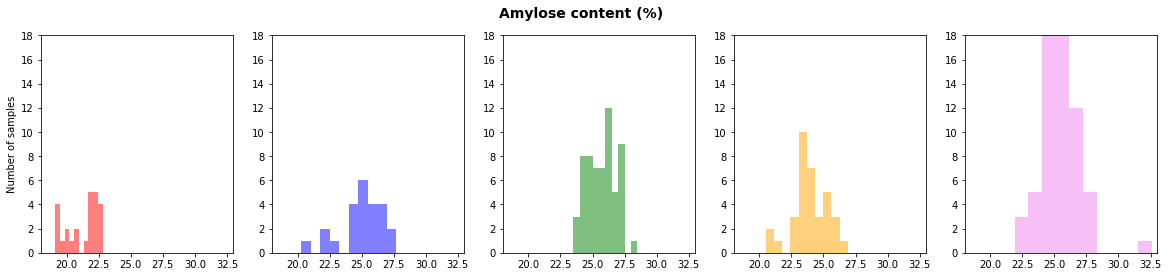

In [25]:
# Histogram for amylose content
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].AC, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].AC, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].AC, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].AC, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].AC, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Amylose content (%)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([18,33])
ax2.set_xlim([18,33])
ax3.set_xlim([18,33])
ax4.set_xlim([18,33])
ax5.set_xlim([18,33])

ax1.set_ylim([0,18])
ax2.set_ylim([0,18])
ax3.set_ylim([0,18])
ax4.set_ylim([0,18])
ax5.set_ylim([0,18])

(0, 18)

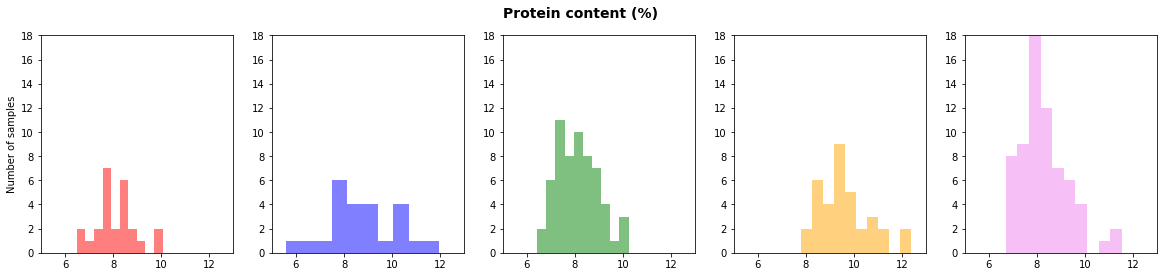

In [26]:
# Histogram for protein content
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].PC, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].PC, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].PC, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].PC, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].PC, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Protein content (%)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([5,13])
ax2.set_xlim([5,13])
ax3.set_xlim([5,13])
ax4.set_xlim([5,13])
ax5.set_xlim([5,13])

ax1.set_ylim([0,18])
ax2.set_ylim([0,18])
ax3.set_ylim([0,18])
ax4.set_ylim([0,18])
ax5.set_ylim([0,18])

(0, 18)

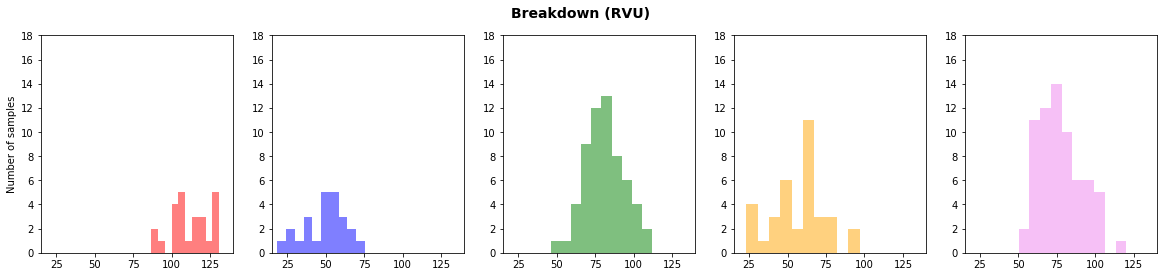

In [27]:
# Histogram for breakdown
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].BD, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].BD, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].BD, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].BD, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].BD, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Breakdown (RVU)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([15,140])
ax2.set_xlim([15,140])
ax3.set_xlim([15,140])
ax4.set_xlim([15,140])
ax5.set_xlim([15,140])

ax1.set_ylim([0,18])
ax2.set_ylim([0,18])
ax3.set_ylim([0,18])
ax4.set_ylim([0,18])
ax5.set_ylim([0,18])

(0, 20)

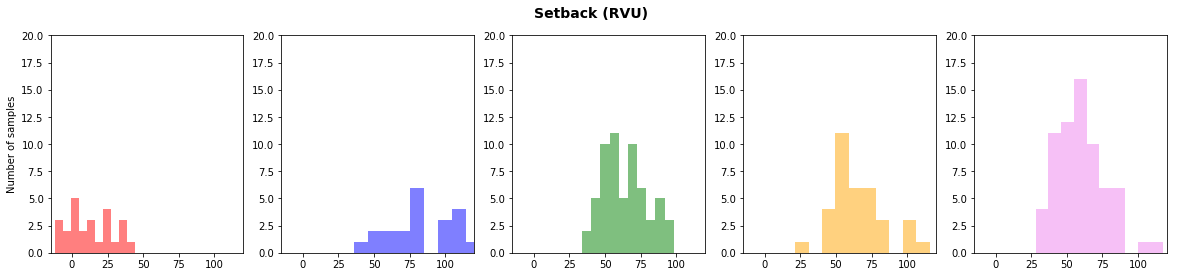

In [28]:
# Histogram for setback
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].SB, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].SB, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].SB, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].SB, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].SB, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Setback (RVU)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([-15,120])
ax2.set_xlim([-15,120])
ax3.set_xlim([-15,120])
ax4.set_xlim([-15,120])
ax5.set_xlim([-15,120])

ax1.set_ylim([0,20])
ax2.set_ylim([0,20])
ax3.set_ylim([0,20])
ax4.set_ylim([0,20])
ax5.set_ylim([0,20])

(0, 16)

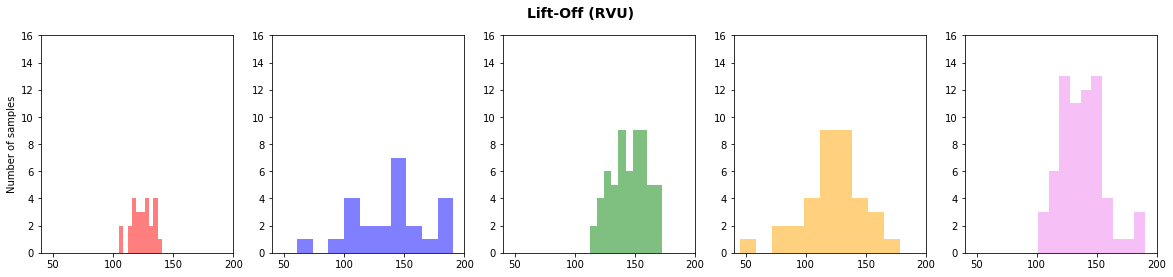

In [29]:
# Histogram for lift-off
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].LO, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].LO, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].LO, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].LO, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].LO, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Lift-Off (RVU)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([40,200])
ax2.set_xlim([40,200])
ax3.set_xlim([40,200])
ax4.set_xlim([40,200])
ax5.set_xlim([40,200])

ax1.set_ylim([0,16])
ax2.set_ylim([0,16])
ax3.set_ylim([0,16])
ax4.set_ylim([0,16])
ax5.set_ylim([0,16])

(0, 18)

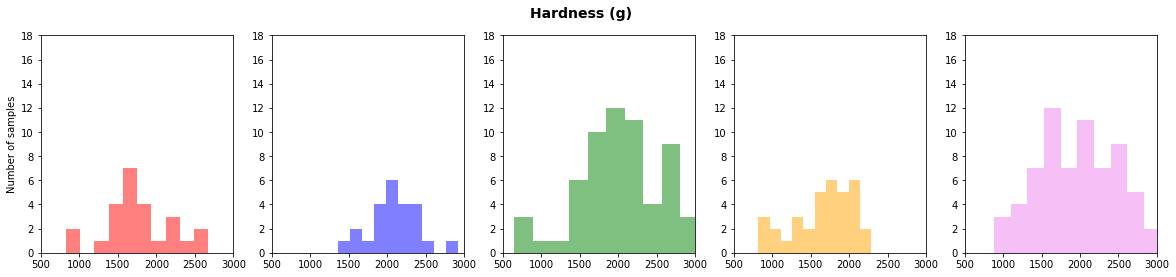

In [30]:
# Histogram for hardness
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].HRD, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].HRD, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].HRD, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].HRD, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].HRD, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Hardness (g)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([500,3000])
ax2.set_xlim([500,3000])
ax3.set_xlim([500,3000])
ax4.set_xlim([500,3000])
ax5.set_xlim([500,3000])

ax1.set_ylim([0,18])
ax2.set_ylim([0,18])
ax3.set_ylim([0,18])
ax4.set_ylim([0,18])
ax5.set_ylim([0,18])

(0, 20)

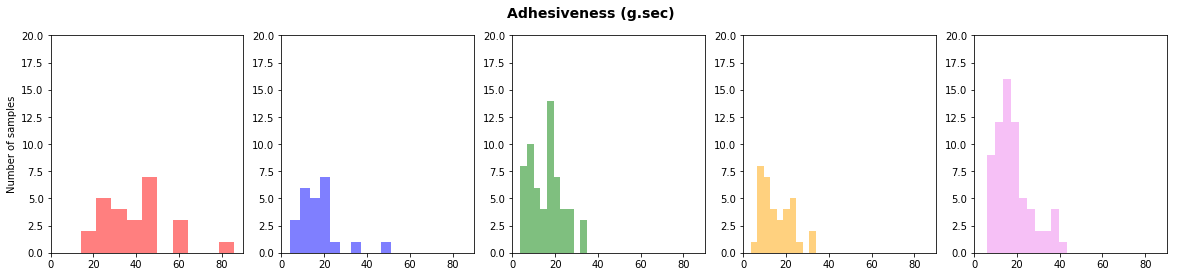

In [31]:
# Histogram for adhesiveness
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].ADH, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].ADH, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].ADH, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].ADH, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].ADH, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Adhesiveness (g.sec)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([0,90])
ax2.set_xlim([0,90])
ax3.set_xlim([0,90])
ax4.set_xlim([0,90])
ax5.set_xlim([0,90])

ax1.set_ylim([0,20])
ax2.set_ylim([0,20])
ax3.set_ylim([0,20])
ax4.set_ylim([0,20])
ax5.set_ylim([0,20])

(0, 22)

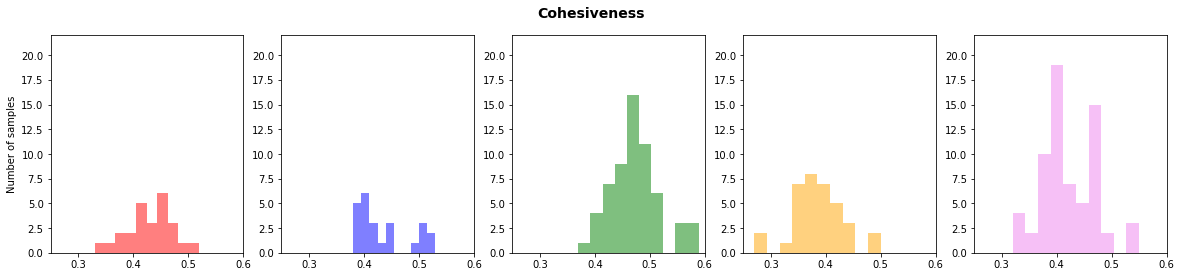

In [32]:
# Histogram for cohesiveness
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].COH, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].COH, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].COH, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].COH, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].COH, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Cohesiveness", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([0.25,0.6])
ax2.set_xlim([0.25,0.6])
ax3.set_xlim([0.25,0.6])
ax4.set_xlim([0.25,0.6])
ax5.set_xlim([0.25,0.6])

ax1.set_ylim([0,22])
ax2.set_ylim([0,22])
ax3.set_ylim([0,22])
ax4.set_ylim([0,22])
ax5.set_ylim([0,22])

(0, 12)

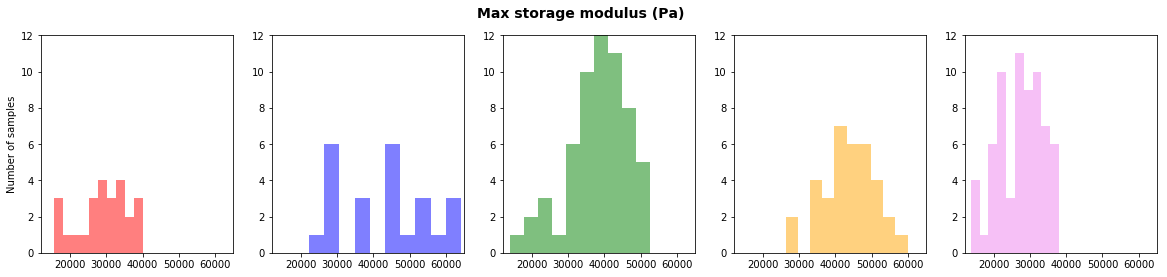

In [33]:
# Histogram for storage modulus
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].SMMAX, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].SMMAX, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].SMMAX, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].SMMAX, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].SMMAX, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Max storage modulus (Pa)", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([12000,65000])
ax2.set_xlim([12000,65000])
ax3.set_xlim([12000,65000])
ax4.set_xlim([12000,65000])
ax5.set_xlim([12000,65000])

ax1.set_ylim([0,12])
ax2.set_ylim([0,12])
ax3.set_ylim([0,12])
ax4.set_ylim([0,12])
ax5.set_ylim([0,12])

(0, 20)

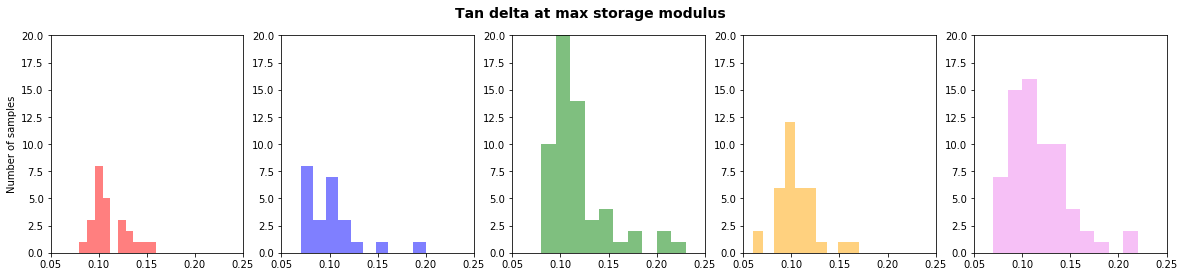

In [34]:
# Histogram for tan delta at max storage modulus
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].TD_SMMAX, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].TD_SMMAX, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].TD_SMMAX, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].TD_SMMAX, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].TD_SMMAX, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Tan delta at max storage modulus", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([0.05,0.25])
ax2.set_xlim([0.05,0.25])
ax3.set_xlim([0.05,0.25])
ax4.set_xlim([0.05,0.25])
ax5.set_xlim([0.05,0.25])

ax1.set_ylim([0,20])
ax2.set_ylim([0,20])
ax3.set_ylim([0,20])
ax4.set_ylim([0,20])
ax5.set_ylim([0,20])

(0, 20)

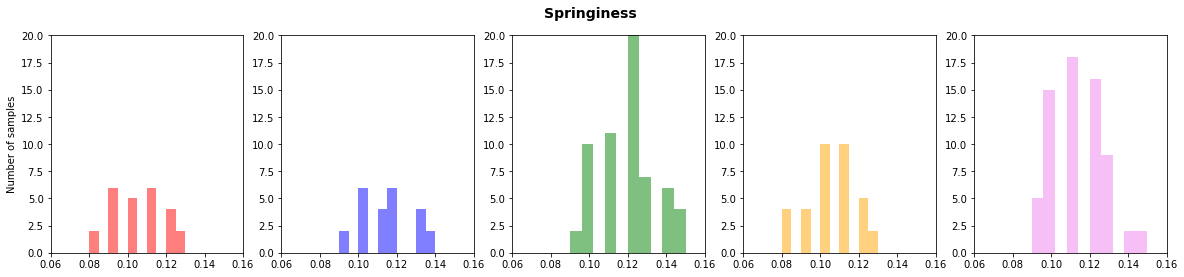

In [35]:
# Histogram for springiness
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,4))

ax1.hist(dfs[0].SPR, 10, facecolor = "red", alpha = 0.5, label = "Cluster 0")
ax2.hist(dfs[1].SPR, 10, facecolor = "blue", alpha = 0.5, label = "Cluster 1")
ax3.hist(dfs[2].SPR, 10, facecolor = "green", alpha = 0.5, label = "Cluster 2")
ax4.hist(dfs[3].SPR, 10, facecolor = "orange", alpha = 0.5, label = "Cluster 3")
ax5.hist(dfs[4].SPR, 10, facecolor = "violet", alpha = 0.5, label = "Cluster 4")

plt.suptitle("Springiness", fontweight = "bold", fontsize = 14)
ax1.set_ylabel("Number of samples")

ax1.set_xlim([0.06,0.16])
ax2.set_xlim([0.06,0.16])
ax3.set_xlim([0.06,0.16])
ax4.set_xlim([0.06,0.16])
ax5.set_xlim([0.06,0.16])

ax1.set_ylim([0,20])
ax2.set_ylim([0,20])
ax3.set_ylim([0,20])
ax4.set_ylim([0,20])
ax5.set_ylim([0,20])

### Deep Learning 

In [36]:
# Dependencies
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

/anaconda3/envs/PythonData/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
# Divide the dataframe into response variable (y) and independent variables (X)
X = data3.drop("Cluster", axis = 1)
y = data3["Cluster"]
print(X.shape, y.shape)

(211, 18) (211,)


In [38]:
# Create testing and training data sets from the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

# Scale the independent variables
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label encode the response variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# One-hot-encoding for the response variable
y_train2 = to_categorical(encoded_y_train)
y_test2 = to_categorical(encoded_y_test)

In [39]:
# Create a deep learning neural network model
deep_model = Sequential()

# Add an input layer
deep_model.add(Dense(units = 100, activation = "relu", input_dim = X.shape[1]))

# Add a hidden layer
deep_model.add(Dense(units = 100, activation = "relu"))

# Add an output layer
deep_model.add(Dense(units = len(clusters), activation = "softmax"))

In [40]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1900      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
Total params: 12,505
Trainable params: 12,505
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
deep_model.compile(optimizer = "adam", 
                   loss = "categorical_crossentropy", # three classes
                   metrics = ["accuracy"])

# Fit the model
deep_model.fit(X_train_scaled, y_train2,
               epochs = 100, shuffle = True,
               verbose = 2)

Epoch 1/100
 - 0s - loss: 1.5275 - acc: 0.3544
Epoch 2/100
 - 0s - loss: 1.2732 - acc: 0.6709
Epoch 3/100
 - 0s - loss: 1.0710 - acc: 0.8038
Epoch 4/100
 - 0s - loss: 0.8953 - acc: 0.9241
Epoch 5/100
 - 0s - loss: 0.7417 - acc: 0.9241
Epoch 6/100
 - 0s - loss: 0.6093 - acc: 0.9557
Epoch 7/100
 - 0s - loss: 0.4931 - acc: 0.9684
Epoch 8/100
 - 0s - loss: 0.3997 - acc: 0.9873
Epoch 9/100
 - 0s - loss: 0.3232 - acc: 0.9873
Epoch 10/100
 - 0s - loss: 0.2648 - acc: 0.9873
Epoch 11/100
 - 0s - loss: 0.2200 - acc: 0.9873
Epoch 12/100
 - 0s - loss: 0.1837 - acc: 0.9873
Epoch 13/100
 - 0s - loss: 0.1569 - acc: 0.9937
Epoch 14/100
 - 0s - loss: 0.1347 - acc: 0.9937
Epoch 15/100
 - 0s - loss: 0.1170 - acc: 0.9937
Epoch 16/100
 - 0s - loss: 0.1027 - acc: 1.0000
Epoch 17/100
 - 0s - loss: 0.0899 - acc: 1.0000
Epoch 18/100
 - 0s - loss: 0.0805 - acc: 1.0000
Epoch 19/100
 - 0s - loss: 0.0717 - acc: 1.0000
Epoch 20/100
 - 0s - loss: 0.0638 - acc: 1.0000
Epoch 21/100
 - 0s - loss: 0.0575 - acc: 1.0000
E

In [42]:
# Actual cluster assignments
encoded_y_test

array([2, 1, 4, 2, 4, 2, 4, 3, 4, 0, 0, 1, 3, 3, 4, 4, 0, 4, 2, 4, 4, 3,
       0, 4, 1, 3, 2, 4, 0, 4, 2, 4, 2, 2, 3, 2, 1, 2, 2, 3, 2, 1, 3, 4,
       3, 0, 2, 2, 4, 2, 1, 4, 4])

In [43]:
# Predicted cluster assignments
encoded_predictions = deep_model.predict_classes(X_test_scaled)
y_predictions = label_encoder.inverse_transform(encoded_predictions)
y_predictions

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([2, 1, 4, 2, 4, 2, 4, 1, 4, 0, 0, 1, 3, 1, 4, 4, 0, 4, 2, 4, 2, 3,
       0, 4, 3, 2, 2, 4, 0, 2, 2, 4, 2, 2, 3, 2, 1, 2, 2, 3, 4, 1, 3, 4,
       3, 0, 2, 2, 4, 2, 1, 2, 4], dtype=int32)

#### Evaluate model performance

In [44]:
# Performance metrics of the deep learning model (loss and accuracy)
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test2, verbose = 2)
print(f"Deep Learning Neural Network - Loss: {model_loss}; Accuracy: {model_accuracy}")

Deep Learning Neural Network - Loss: 0.43599018820051877; Accuracy: 0.8490566060228167


Confusion matrix

In [45]:
confusion_matrix(encoded_y_test, y_predictions)

array([[ 6,  0,  0,  0,  0],
       [ 0,  5,  0,  1,  0],
       [ 0,  0, 14,  0,  1],
       [ 0,  2,  1,  6,  0],
       [ 0,  0,  3,  0, 14]])

Precision score

In [46]:
precision_score(encoded_y_test, y_predictions, average = "micro")

0.8490566037735849

Recall

In [47]:
recall_score(encoded_y_test, y_predictions, average = "micro")

0.8490566037735849

F1 score

In [48]:
f1_score(encoded_y_test, y_predictions, average = "micro")

0.8490566037735849

Cohen's Kappa score

In [49]:
cohen_kappa_score(encoded_y_test, y_predictions)

0.8021465235650956

In [50]:
# Save the model
deep_model.save("deep_learning.h5")